In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
a = np.random.randn(1000)
b = a + 0.9*np.random.randn(1000)

In [3]:
data = pd.DataFrame(list(zip(a, b)),columns =['X', 'Y'])
data

,X,Y
0,-0.420657,-0.929030
1,-2.610646,-1.734259
2,0.177144,1.009214
3,0.764221,1.121752
4,0.085155,-1.438152
...,...,...
995,-0.665919,0.175533
996,0.232659,2.145170
997,-0.007757,0.502513
998,0.700423,-0.460991


In [4]:
X = data.iloc[:,0]
Y = data.iloc[:,1]

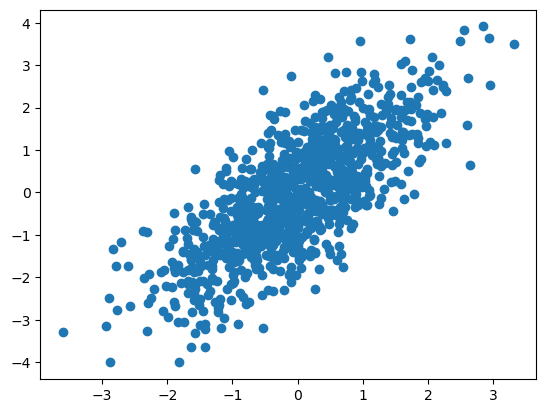

In [5]:
plt.scatter(X,Y)

# LINEAR REGRESSION

In [6]:
m1 = sum((X*Y) - (Y.mean()*X))/sum((X*X) - X.mean()*X)
m1

1.0058371758905245

In [7]:
c1 = Y.mean() - m1*Y.mean()
c1

0.00020349995686949618

USING LINEAR REGRESSION FORMULA
m =  1.0058371758905245
c =  0.00020349995686949618


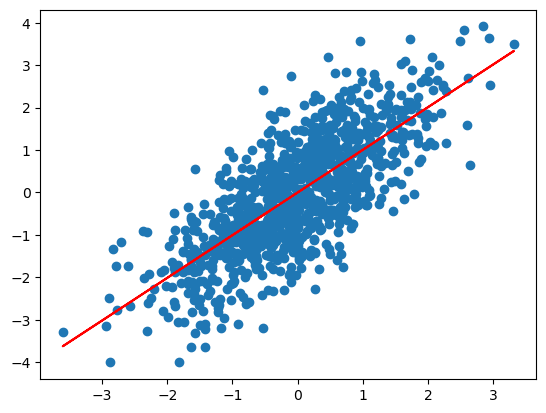

In [8]:
y_pred = m1*X + c1
plt.scatter(X,Y)
plt.plot(X, y_pred, c='red')
print("USING LINEAR REGRESSION FORMULA")
print("m = ", m1)
print("c = ", c1)

# USING GRADIENT DESCENT

In [9]:
# Let slope m = 0 and constant c = 0, n will be 1000
# Dm = -2/n*S[(xi)(yi-yi')]
# Dc = -2/n*S[yi-yi']
# updating m and c with learning rate L
# m = m-L*Dm
# c = c-L*Dc

def optimize(m, c, iteration, L, x, y):
    n = len(x)
    for i in range(iteration):
        y_pred = m*x+c
        Dm = (-2/n)*sum(x*(y - y_pred))
        Dc = (-2/n)*sum((y - y_pred))
        m = m - (L*Dm)
        c = c - (L*Dc)
    return(m, c, y_pred)

In [10]:
# for 50 iterations
m2, c2, y_pred = optimize(0, 0, 50, 0.001, X, Y)
print("m = ",m2)
print("c = ",c2)

m =  0.09861612936088743
c =  -0.0032208104580584485


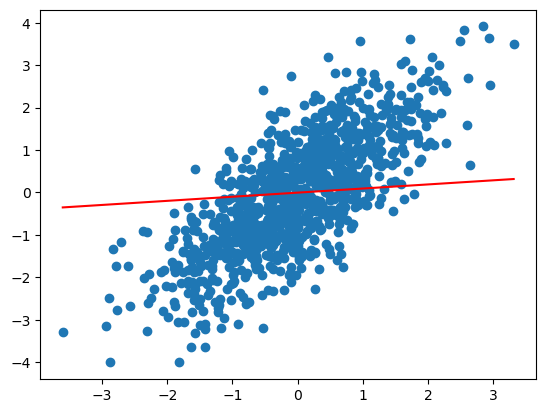

In [11]:
plt.scatter(X, Y)
plt.plot([min(X),max(X)], [min(y_pred),max(y_pred)], color='red')

In [12]:
# for 1000 iterations
m2, c2, y_pred = optimize(0, 0, 1000, 0.001, X, Y)
print("m = ",m2)
print("c = ",c2)

m =  0.8780162234853978
c =  -0.017433301897908707


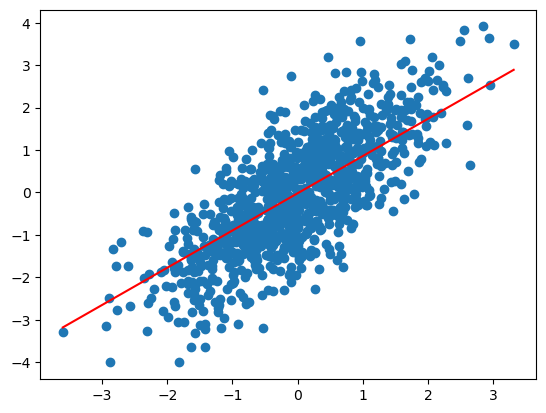

In [13]:
plt.scatter(X, Y)
plt.plot([min(X),max(X)], [min(y_pred),max(y_pred)], color='red')

In [14]:
# for 5000 iterations
m2, c2, y_pred = optimize(0, 0, 50000, 0.001, X, Y)
print("m = ",m2)
print("c = ",c2)

m =  1.0058371758904727
c =  -0.0137452667066781


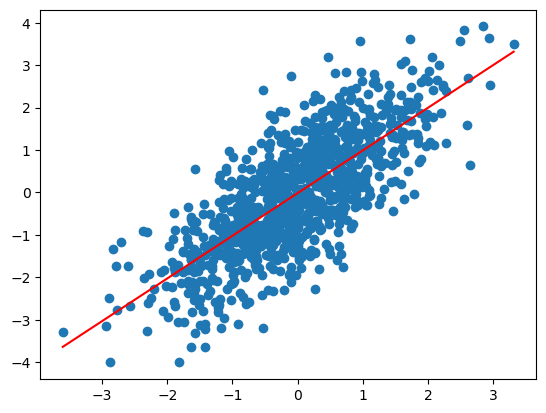

In [15]:
plt.scatter(X, Y)
plt.plot([min(X),max(X)], [min(y_pred),max(y_pred)], color='red')

# USING SKLEARN LIBRARY

In [16]:
from sklearn.model_selection import train_test_split#spilt the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [18]:
reg.fit(x_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [19]:
y_pred_sklearn=reg.predict(x_test.values.reshape(-1, 1))
print("USING SKLEARN")
print("m3 = ", reg.coef_)
print("c3 = ", reg.intercept_)

USING SKLEARN
m3 =  [1.03502605]
c3 =  -0.006914101539353755


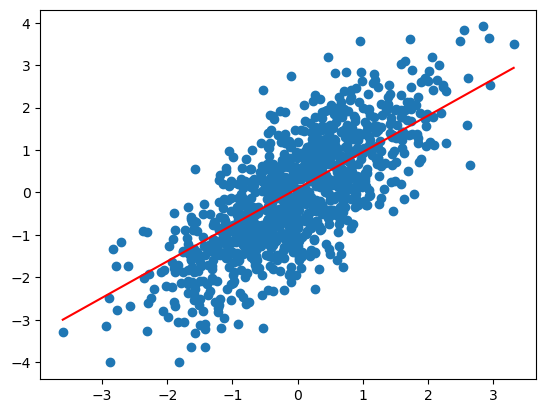

In [20]:
plt.scatter(X, Y)
plt.plot([min(X),max(X)], [min(y_pred_sklearn),max(y_pred_sklearn)], color='red')

## Inference
### In gradient descent method the values of m and c depends on the parameters like learning rate and number of iterations. Hence tuning these parameters will give better values of m and c, whereas while using sklearn, already existing functions give the values of m and c, therefore the only parameter we can tune here is the size of train test split.

In [21]:
print("USING LINEAR REGRESSION FORMULA")
print("m = ", m1)
print("c = ", c1)

print("USING GRADIENT DESCENT")
print("m = ", m2)
print("c = ", c2)

print("USING SKLEARN LIBRARY")
print("m = ", reg.coef_)
print("c = ", reg.intercept_)

USING LINEAR REGRESSION FORMULA
m =  1.0058371758905245
c =  0.00020349995686949618
USING GRADIENT DESCENT
m =  1.0058371758904727
c =  -0.0137452667066781
USING SKLEARN LIBRARY
m =  [1.03502605]
c =  -0.006914101539353755
